## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [164]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [165]:
df = pd.read_csv("./QueryResults.csv", names=["DATE", "TAG", "POSTS"], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [166]:
print(df.head())
print(df.tail())

                  DATE         TAG  POSTS
0  2008-07-01 00:00:00          c#      3
1  2008-08-01 00:00:00    assembly      8
2  2008-08-01 00:00:00  javascript    162
3  2008-08-01 00:00:00           c     85
4  2008-08-01 00:00:00      python    124
                     DATE    TAG  POSTS
1986  2020-07-01 00:00:00      r   5694
1987  2020-07-01 00:00:00     go    743
1988  2020-07-01 00:00:00   ruby    775
1989  2020-07-01 00:00:00   perl    182
1990  2020-07-01 00:00:00  swift   3607


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [167]:
print(df.size)
print(df.shape)

5973
(1991, 3)


**Challenge**: Count the number of entries in each column of the dataframe

In [168]:
print(df.count())

DATE     1991
TAG      1991
POSTS    1991
dtype: int64


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [169]:
df.groupby("TAG").sum()

,DATE,POSTS
TAG,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,34852
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,336042
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1423530
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,684210
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,46212
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,47499
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1696403
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2056510
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,65286


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [178]:
df["DATE"] = pd.to_datetime(df["DATE"])

In [180]:
print(df)

           DATE         TAG  POSTS
0    2008-07-01          c#      3
1    2008-08-01    assembly      8
2    2008-08-01  javascript    162
3    2008-08-01           c     85
4    2008-08-01      python    124
...         ...         ...    ...
1986 2020-07-01           r   5694
1987 2020-07-01          go    743
1988 2020-07-01        ruby    775
1989 2020-07-01        perl    182
1990 2020-07-01       swift   3607

[1991 rows x 3 columns]


## Data Manipulation



In [183]:
reshaped_df = df.pivot_table(index="DATE", columns="TAG", values="POSTS", fill_value=0)
print(reshaped_df)

TAG         assembly     c     c#   c++  delphi   go   java  javascript  perl  \
DATE                                                                            
2008-07-01         0     0      3     0       0    0      0           0     0   
2008-08-01         8    85    511   164      14    0    222         162    28   
2008-09-01        28   321   1649   755     105    0   1137         640   131   
2008-10-01        15   303   1989   811     112    0   1153         725   127   
2008-11-01        17   259   1730   735     141    0    958         579    97   
...              ...   ...    ...   ...     ...  ...    ...         ...   ...   
2020-03-01       317  2670   8954  5107     181  719  13253       20483   215   
2020-04-01       406  3472  10042  6820     250  887  15377       24634   240   
2020-05-01       386  3602   9923  7063     221  826  14711       25196   228   
2020-06-01       363  2757   9064  6161     214  765  13015       23360   203   
2020-07-01       298  2294  

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [184]:
reshaped_df.shape

(145, 14)

In [185]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [186]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0,0,3,0,0,0,0,0,0,0,0,0,0,0
2008-08-01,8,85,511,164,14,0,222,162,28,161,124,0,73,0
2008-09-01,28,321,1649,755,105,0,1137,640,131,482,542,6,290,0
2008-10-01,15,303,1989,811,112,0,1153,725,127,617,510,0,249,0
2008-11-01,17,259,1730,735,141,0,958,579,97,504,452,1,160,0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [190]:
reshaped_df.count()

TAG
assembly      145
c             145
c#            145
c++           145
delphi        145
go            145
java          145
javascript    145
perl          145
php           145
python        145
r             145
ruby          145
swift         145
dtype: int64

False

In [192]:
reshaped_df["java"]

DATE
2008-07-01        0
2008-08-01      222
2008-09-01     1137
2008-10-01     1153
2008-11-01      958
              ...  
2020-03-01    13253
2020-04-01    15377
2020-05-01    14711
2020-06-01    13015
2020-07-01    12723
Name: java, Length: 145, dtype: int64

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

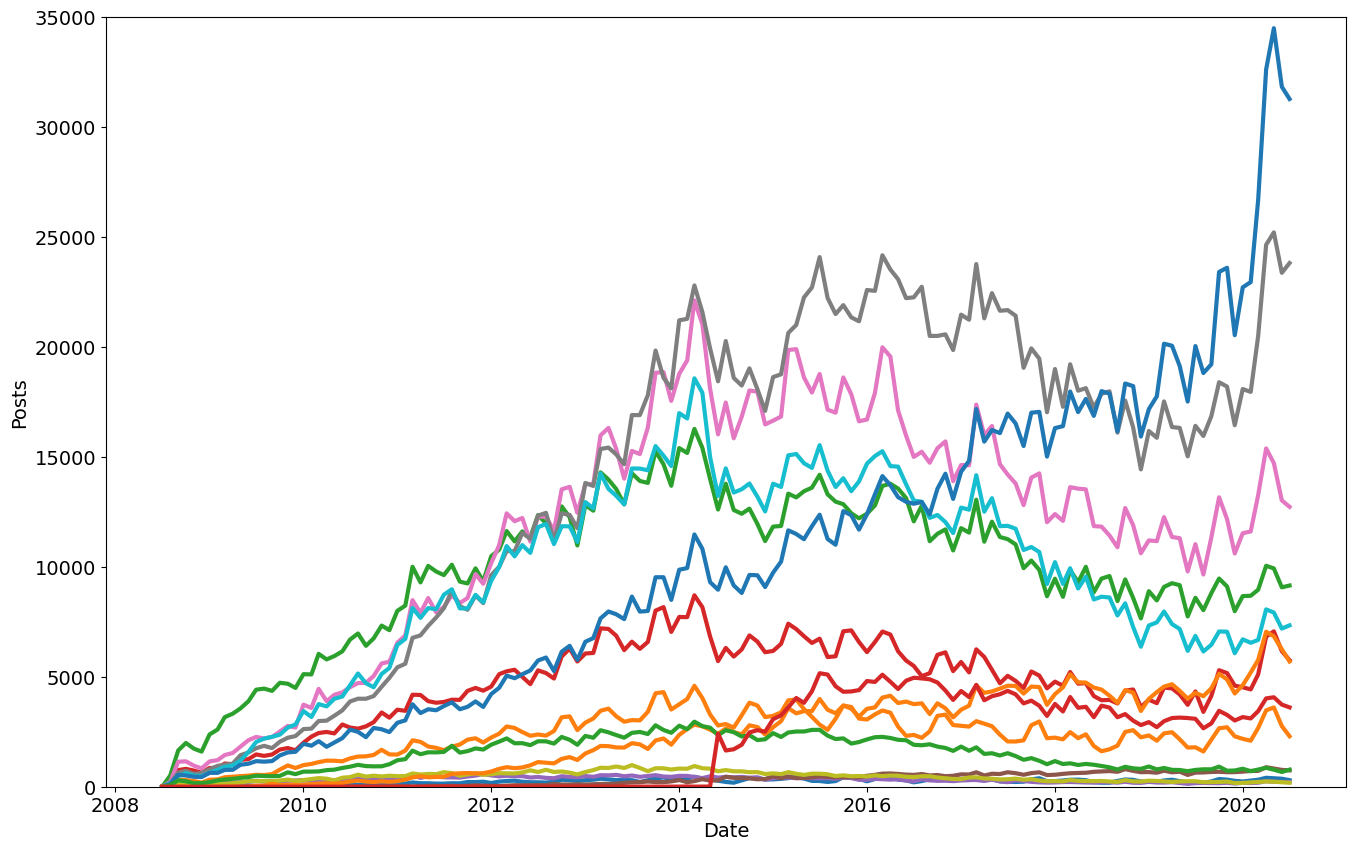

In [218]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Posts", fontsize=14)
plt.ylim(0, 35000)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], 
             linewidth=3, label=reshaped_df[column].name)
    
plt.legend(fontsize=16)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 